# Load Libraries, nltk_data, and pretrained model 

In [2]:
import re
import pandas as pd
import numpy as np
import random
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import gensim
from gensim.models import FastText
from gensim.models.fasttext import load_facebook_model
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('wordnet', "/kaggle/working/nltk_data/")
nltk.download('omw-1.4', "/kaggle/working/nltk_data/")
! unzip /kaggle/working/nltk_data/corpora/wordnet.zip -d /kaggle/working/nltk_data/corpora
! unzip /kaggle/working/nltk_data/corpora/omw-1.4.zip -d /kaggle/working/nltk_data/corpora

nltk.data.path.append("/kaggle/working/nltk_data/")

! wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
! gunzip "cc.en.300.bin.gz"

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...
Archive:  /kaggle/working/nltk_data/corpora/wordnet.zip
   creating: /kaggle/working/nltk_data/corpora/wordnet/
  inflating: /kaggle/working/nltk_data/corpora/wordnet/lexnames  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adv  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.verb  
  inflating: /kag

# Read Data

In [3]:
df = pd.read_json('/kaggle/input/yelp-dataset/yelp_academic_dataset_tip.json', lines=True)
df

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


In [4]:
data = df['text']
data

0                            Avengers time with the ladies.
1         They have lots of good deserts and tasty cuban...
2                    It's open even when you think it isn't
3                                 Very decent fried chicken
4                    Appetizers.. platter special for lunch
                                ...                        
908910                Disappointed in one of your managers.
908911                              Great food and service.
908912                                  Love their Cubans!!
908913                              Great pizza great price
908914                    Food is good value but a bit hot!
Name: text, Length: 908915, dtype: object

# Text Preprocessing Function

In [5]:
def preprocess_text(sentence):
    processed_sentences = []
    for text in sentence:
        text = str(text)
        # Cleaning data from symbols or characters
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        
        # Lowercasing
        text = text.lower()
        
        # Tokenization
        words = word_tokenize(text)
        
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]
        
        # Removing punctuation and non-alphanumeric characters
        words = [re.sub(r'[^\w\s]', '', word) for word in words]
        
        # Stop words removal
        stop_words = set(stopwords.words('english'))
        filtered_words = [word for word in words if word not in stop_words]
        
        # Unique words
        unique_words = set(filtered_words)

        processed_sentences.append(list(unique_words))
        
    return processed_sentences

In [6]:
words = preprocess_text(data[:15000])

In [8]:
print(words)

[['avenger', 'lady', 'time'], ['desert', 'tasty', 'lot', 'sandwich', 'cuban', 'good'], ['think', 'open', 'isnt', 'even'], ['fried', 'chicken', 'decent'], ['special', 'lunch', 'platter', 'appetizer'], ['vanilla', 'cup', 'chili', 'onion', 'far', 'cheeseburger', 'cocacolaso', 'relish', 'pickle', 'single'], ['pm', 'saturday', 'dec', 'center', 'make', 'patcos', 'sleigh', 'lindenwold', 'silver', 'decorated', 'w', 'elf', 'leave', 'great', 'city', 'train', 'kid', 'th', 'santa', 'stop', 'ride'], ['area', 'eat', 'game', 'best', 'place', 'probably', 'cool', 'spring', 'watch'], ['taco'], ['downtown', 'tampa', 'starbucks', 'never', 'boring', 'substitute', 'ugh'], ['order', 'soup', 'tortilla'], ['coming', 'good', 'definitely', 'back'], ['must', 'stop', 'hotlight'], ['let', 'go', 'yankee'], ['rally', 'food', 'basically'], ['star', 'go', 'eat', 'never', 'yvonne', 'dinner', 'dont', 'really', 'negative', 'restaurant', 'intended', 'l', 'close', 'didnt'], ['min', 'take', 'right', 'tight'], ['entree', 'gri

In [ ]:
# test_words = preprocess_text(data[15000:15050])

# Select random words to test the model

In [56]:
num_random_words = 10
random_words = random.sample(words, num_random_words)

In [57]:
random_words

[['favor', 'love'],
 ['fish', 'service', 'bait', 'customer', 'price', 'fresh', 'good'],
 ['cucumber', 'hello'],
 ['trying',
  'sweet',
  'juicy',
  'thick',
  'dont',
  'wow',
  'without',
  'leave',
  'holy',
  'heavenly',
  'bacon'],
 ['half', 'bottle', 'price', 'tuesday', 'wine'],
 ['back', 'staff', 'place', 'really', 'top', 'food', 'decor', 'great'],
 ['go', 'tasty', 'chip', 'salsa', 'spicy', 'well'],
 ['brunch', 'great'],
 ['closed', 'must', 'sign', 'life', 'season', 'existence'],
 ['pastry',
  'cake',
  'came',
  'frosting',
  'wa',
  'blond',
  'opened',
  'come',
  'hair',
  'greeted',
  'piece',
  'gross',
  'sticking',
  'today',
  'togo',
  'got',
  'giant',
  'home',
  'thats']]

In [58]:
test_words = []
for set_item in random_words:
    for element in set_item:
        test_words.append(element)

In [59]:
print(test_words)

['favor', 'love', 'fish', 'service', 'bait', 'customer', 'price', 'fresh', 'good', 'cucumber', 'hello', 'trying', 'sweet', 'juicy', 'thick', 'dont', 'wow', 'without', 'leave', 'holy', 'heavenly', 'bacon', 'half', 'bottle', 'price', 'tuesday', 'wine', 'back', 'staff', 'place', 'really', 'top', 'food', 'decor', 'great', 'go', 'tasty', 'chip', 'salsa', 'spicy', 'well', 'brunch', 'great', 'closed', 'must', 'sign', 'life', 'season', 'existence', 'pastry', 'cake', 'came', 'frosting', 'wa', 'blond', 'opened', 'come', 'hair', 'greeted', 'piece', 'gross', 'sticking', 'today', 'togo', 'got', 'giant', 'home', 'thats']


In [21]:
embedding_size = 300
window_size = 5
min_word = 5
down_sampling = 1e-2

# Train FastText Model on the data

In [38]:
fastText_model = FastText(words,
    vector_size=embedding_size, # Dimensionality of the word vectors. ,
    window=window_size,
    min_count=min_word, # The model ignores all words with total frequency lower than this.
    sample=down_sampling, # threshold which higher-frequency words are randomly down sampled
    workers = 4, # Num threads to train the model (faster training with multicore comp.)
    sg=1, # Training algorithm: skip-gram if sg=1, otherwise CBOW.
    epochs=150) # Number of iterations (epochs) over the corpus

fastText_model.save("FastText Model")

In [77]:
word = test_words[0]
similar = pd.DataFrame(fastText_model.wv.most_similar(word, topn=10), columns=[word, 'score'])
similar

,favor,score
0,favorite,0.558537
1,fav,0.409734
2,flavor,0.398149
3,fave,0.358287
4,pastor,0.351405
5,ghetto,0.350230
6,missing,0.340334
7,banh,0.330834
8,eggplant,0.323013
9,stuffed,0.321078


In [78]:
dissimilar = pd.DataFrame(fastText_model.wv.most_similar(negative=[word], topn=10), columns=[word, 'score'])
dissimilar

,favor,score
0,site,0.021991
1,running,0.017665
2,woman,0.016531
3,alcohol,0.008243
4,bottle,0.001816
5,dessert,-0.000376
6,covered,-0.001698
7,terrible,-0.004344
8,better,-0.005185
9,bite,-0.005694


# Top 10 Similar Words

In [70]:
for word in test_words[:10]:
    print(f"Top 10 similar words to ({word}):")
    similar_words = fastText_model.wv.most_similar(word, topn=10)
    for sim_word, sim_score in similar_words:
        print(f"{sim_word}: {sim_score:.4f}")
    print('-----------------------------------------')

Top 10 similar words to (favor):
favorite: 0.5585
fav: 0.4097
flavor: 0.3981
fave: 0.3583
pastor: 0.3514
ghetto: 0.3502
missing: 0.3403
banh: 0.3308
eggplant: 0.3230
stuffed: 0.3211
-----------------------------------------
Top 10 similar words to (love):
loved: 0.3172
belgian: 0.3042
lover: 0.2765
lovely: 0.2723
reuben: 0.2714
rangoon: 0.2685
nutella: 0.2636
steamed: 0.2622
neat: 0.2614
stl: 0.2589
-----------------------------------------
Top 10 similar words to (fish):
crawfish: 0.4188
catfish: 0.3925
spaghetti: 0.3352
truffle: 0.3209
fiesta: 0.3147
taco: 0.3116
guacamole: 0.3104
irish: 0.3068
spanish: 0.3013
horchata: 0.3000
-----------------------------------------
Top 10 similar words to (service):
octopus: 0.3091
positive: 0.2924
peep: 0.2923
tapa: 0.2843
hoagy: 0.2817
advice: 0.2786
ridiculous: 0.2763
sarah: 0.2677
pedicure: 0.2668
soul: 0.2665
-----------------------------------------
Top 10 similar words to (bait):
wait: 0.5775
incredible: 0.4527
inedible: 0.4469
banh: 0.4450

# Top 10 Dissimilar Words

In [71]:
for words in test_words[:10]:
    print(f"Top 10 dissimilar words to ({words}):")
    dissimilar_words = fastText_model.wv.most_similar(negative=[words], topn=10)
    for dissim_word, dissim_score in dissimilar_words:
        print(f"{dissim_word}: {dissim_score:.4f}")
    print('-----------------------------------------')

Top 10 dissimilar words to (favor):
site: 0.0220
running: 0.0177
woman: 0.0165
alcohol: 0.0082
bottle: 0.0018
dessert: -0.0004
covered: -0.0017
terrible: -0.0043
better: -0.0052
bite: -0.0057
-----------------------------------------
Top 10 dissimilar words to (love):
feeling: 0.0452
dept: 0.0442
peak: 0.0336
university: 0.0323
valet: 0.0217
dec: 0.0210
looked: 0.0190
gross: 0.0172
headache: 0.0154
appointment: 0.0136
-----------------------------------------
Top 10 dissimilar words to (fish):
mine: 0.0634
remember: 0.0545
leave: 0.0342
phone: 0.0284
sample: 0.0272
awhile: 0.0265
remembered: 0.0214
reservation: 0.0214
lucky: 0.0211
move: 0.0154
-----------------------------------------
Top 10 dissimilar words to (service):
sunset: 0.0398
said: 0.0290
christmas: 0.0163
wind: 0.0149
spinach: 0.0123
russian: 0.0107
valet: 0.0079
decoration: 0.0078
midnight: 0.0024
available: 0.0007
-----------------------------------------
Top 10 dissimilar words to (bait):
funny: -0.0581
nail: -0.0694
wa

# Pre-trained Model

In [72]:
pretrained_fastText_en = load_facebook_model('/kaggle/working/cc.en.300.bin')

In [73]:
for word in test_words[:10]:
    print(f"Top 10 similar words to ({word}):")
    similar_words = pretrained_fastText_en.wv.most_similar(word, topn=10)
    for sim_word, sim_score in similar_words:
        print(f"{sim_word}: {sim_score:.4f}")
    print('-----------------------------------------')

Top 10 similar words to (favor):
favour: 0.7797
favoring: 0.7011
favors: 0.6582
favored: 0.6241
favor.The: 0.6080
infavor: 0.6016
favor.: 0.5787
favor.If: 0.5694
Favor: 0.5588
favor.But: 0.5576
-----------------------------------------
Top 10 similar words to (love):
adore: 0.7858
looooooooove: 0.7180
loooove: 0.7113
loooooove: 0.7108
looooove: 0.7071
loooooooove: 0.6947
looooooove: 0.6925
LOVE: 0.6914
looove: 0.6903
loooooooooove: 0.6842
-----------------------------------------
Top 10 similar words to (fish):
fishes: 0.7886
fish.The: 0.7333
fish.But: 0.7321
fish.It: 0.7274
fish-: 0.7266
fish.I: 0.7209
fish.This: 0.7132
trout: 0.7108
fish.So: 0.7071
catfish: 0.7025
-----------------------------------------
Top 10 similar words to (service):
servicee: 0.7351
serivce: 0.7327
sevice: 0.7232
serive: 0.7060
services: 0.7012
service.The: 0.6951
service.This: 0.6788
servcie: 0.6641
serivice: 0.6479
service.It: 0.6473
-----------------------------------------
Top 10 similar words to (bait):
b

In [74]:
for words in test_words[:10]:
    print(f"Top 10 dissimilar words to ({words}):")
    dissimilar_words = pretrained_fastText_en.wv.most_similar(negative=[word], topn=10)
    for dissim_word, dissim_score in dissimilar_words:
        print(f"{dissim_word}: {dissim_score:.4f}")
    print('-----------------------------------------')

Top 10 dissimilar words to (favor):
Wavre: 0.1930
NCMI: 0.1847
AllRegs: 0.1785
Expedia.com.: 0.1774
MarketWatch.com.: 0.1755
Noeth: 0.1717
Jeld-Wen: 0.1686
Heiligenkreuz: 0.1684
Reviewable: 0.1675
InfoTrack: 0.1673
-----------------------------------------
Top 10 dissimilar words to (love):
Wavre: 0.1930
NCMI: 0.1847
AllRegs: 0.1785
Expedia.com.: 0.1774
MarketWatch.com.: 0.1755
Noeth: 0.1717
Jeld-Wen: 0.1686
Heiligenkreuz: 0.1684
Reviewable: 0.1675
InfoTrack: 0.1673
-----------------------------------------
Top 10 dissimilar words to (fish):
Wavre: 0.1930
NCMI: 0.1847
AllRegs: 0.1785
Expedia.com.: 0.1774
MarketWatch.com.: 0.1755
Noeth: 0.1717
Jeld-Wen: 0.1686
Heiligenkreuz: 0.1684
Reviewable: 0.1675
InfoTrack: 0.1673
-----------------------------------------
Top 10 dissimilar words to (service):
Wavre: 0.1930
NCMI: 0.1847
AllRegs: 0.1785
Expedia.com.: 0.1774
MarketWatch.com.: 0.1755
Noeth: 0.1717
Jeld-Wen: 0.1686
Heiligenkreuz: 0.1684
Reviewable: 0.1675
InfoTrack: 0.1673
--------------

In [79]:
word = test_words[0]
pretrained_similar = pd.DataFrame(pretrained_fastText_en.wv.most_similar(word, topn=10), columns=[word, 'score'])
pretrained_similar

,favor,score
0,favour,0.779668
1,favoring,0.701146
2,favors,0.658181
3,favored,0.624059
4,favor.The,0.608009
5,infavor,0.601628
6,favor.,0.578679
7,favor.If,0.569392
8,Favor,0.558762
9,favor.But,0.557612


In [80]:
pretrained_dissimilar = pd.DataFrame(pretrained_fastText_en.wv.most_similar(negative=[word], topn=10), columns=[word, 'score'])
pretrained_dissimilar

,favor,score
0,--FSA,0.273888
1,0DL,0.256027
2,G78,0.249142
3,RRIS,0.244337
4,ðŸš,0.241333
5,6HZ,0.238347
6,5HZ,0.237766
7,0NH,0.235954
8,0m,0.234502
9,0AE,0.233403


# Conclusion 

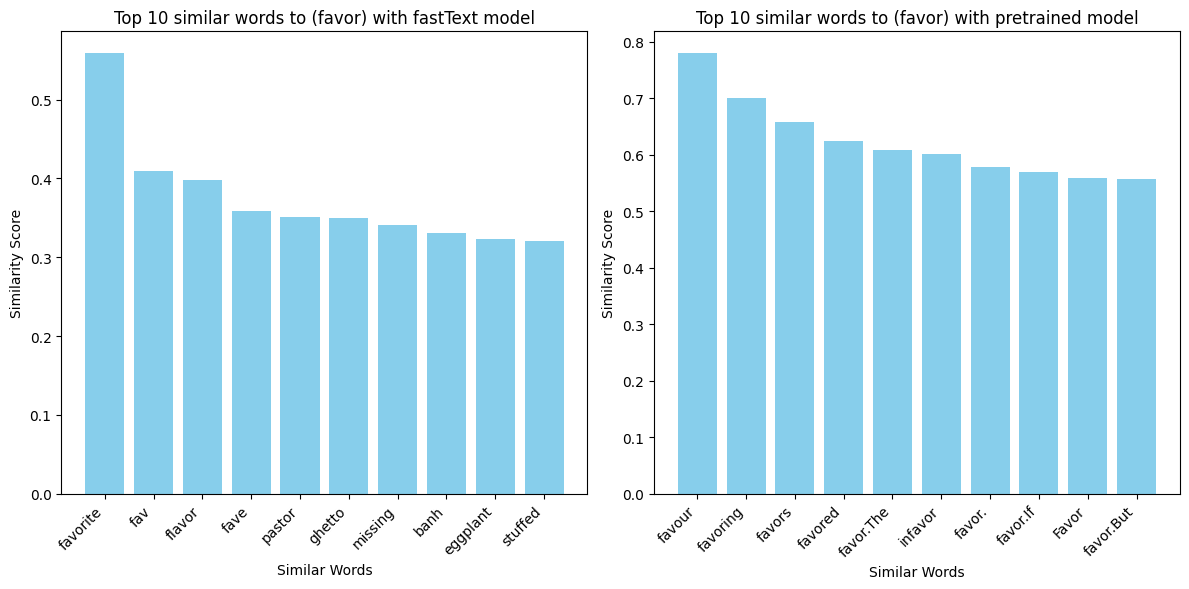

In [82]:
sim_words, sim_scores = zip(*fastText_model.wv.most_similar(word, topn=10))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(sim_words, sim_scores, color='skyblue')
plt.xlabel('Similar Words')
plt.ylabel('Similarity Score')
plt.title(f"Top 10 similar words to ({word}) with fastText model")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

sim_words, sim_scores = zip(*pretrained_fastText_en.wv.most_similar(word, topn=10))
plt.subplot(1, 2, 2)
plt.bar(sim_words, sim_scores, color='skyblue')
plt.xlabel('Similar Words')
plt.ylabel('Similarity Score')
plt.title(f"Top 10 similar words to ({word}) with pretrained model")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

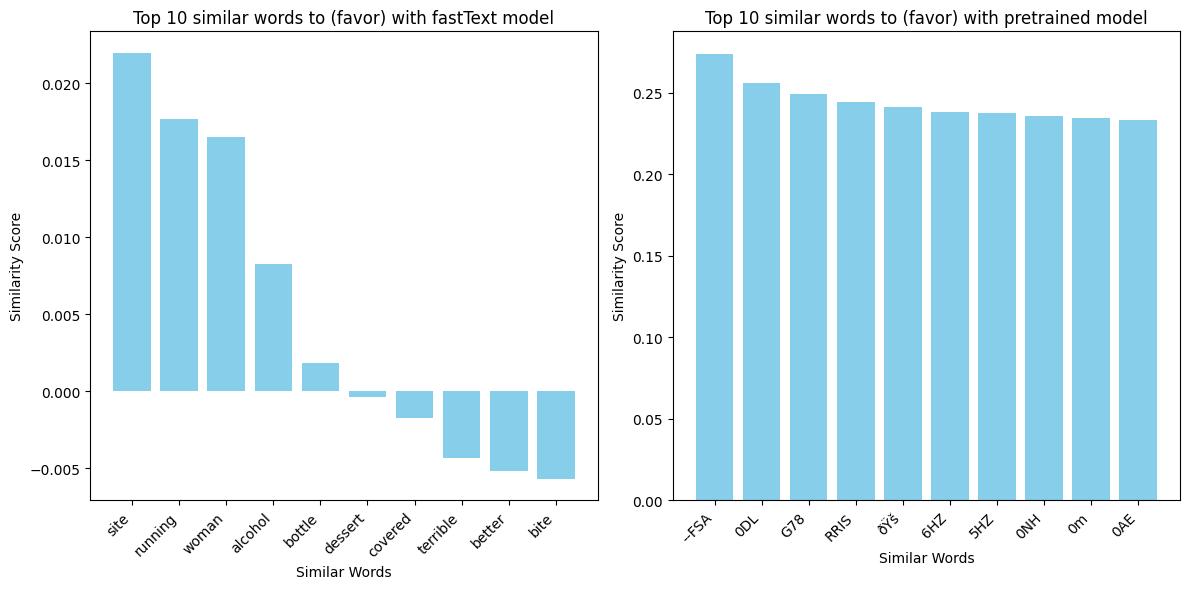

In [83]:
sim_words, sim_scores = zip(*fastText_model.wv.most_similar(negative=[word], topn=10))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(sim_words, sim_scores, color='skyblue')
plt.xlabel('Similar Words')
plt.ylabel('Similarity Score')
plt.title(f"Top 10 similar words to ({word}) with fastText model")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

sim_words, sim_scores = zip(*pretrained_fastText_en.wv.most_similar(negative=[word], topn=10))
plt.subplot(1, 2, 2)
plt.bar(sim_words, sim_scores, color='skyblue')
plt.xlabel('Similar Words')
plt.ylabel('Similarity Score')
plt.title(f"Top 10 similar words to ({word}) with pretrained model")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [84]:
concatenated_df = pd.concat([similar, pretrained_similar])
concatenated_df = pd.concat([similar, pretrained_similar], axis=1)
concatenated_df

,favor,score,favor,score
0,favorite,0.558537,favour,0.779668
1,fav,0.409734,favoring,0.701146
2,flavor,0.398149,favors,0.658181
3,fave,0.358287,favored,0.624059
4,pastor,0.351405,favor.The,0.608009
5,ghetto,0.350230,infavor,0.601628
6,missing,0.340334,favor.,0.578679
7,banh,0.330834,favor.If,0.569392
8,eggplant,0.323013,Favor,0.558762
9,stuffed,0.321078,favor.But,0.557612


In [85]:
concatenated_df2 = pd.concat([dissimilar, pretrained_dissimilar])
concatenated_df2 = pd.concat([dissimilar, pretrained_dissimilar], axis=1)
concatenated_df2

,favor,score,favor,score
0,site,0.021991,--FSA,0.273888
1,running,0.017665,0DL,0.256027
2,woman,0.016531,G78,0.249142
3,alcohol,0.008243,RRIS,0.244337
4,bottle,0.001816,ðŸš,0.241333
5,dessert,-0.000376,6HZ,0.238347
6,covered,-0.001698,5HZ,0.237766
7,terrible,-0.004344,0NH,0.235954
8,better,-0.005185,0m,0.234502
9,bite,-0.005694,0AE,0.233403
